# File Analysis

In [1]:
import os
from welly import Project, Well
import pandas as pd 
import seaborn as sns 
import script as sc

## LAS Files
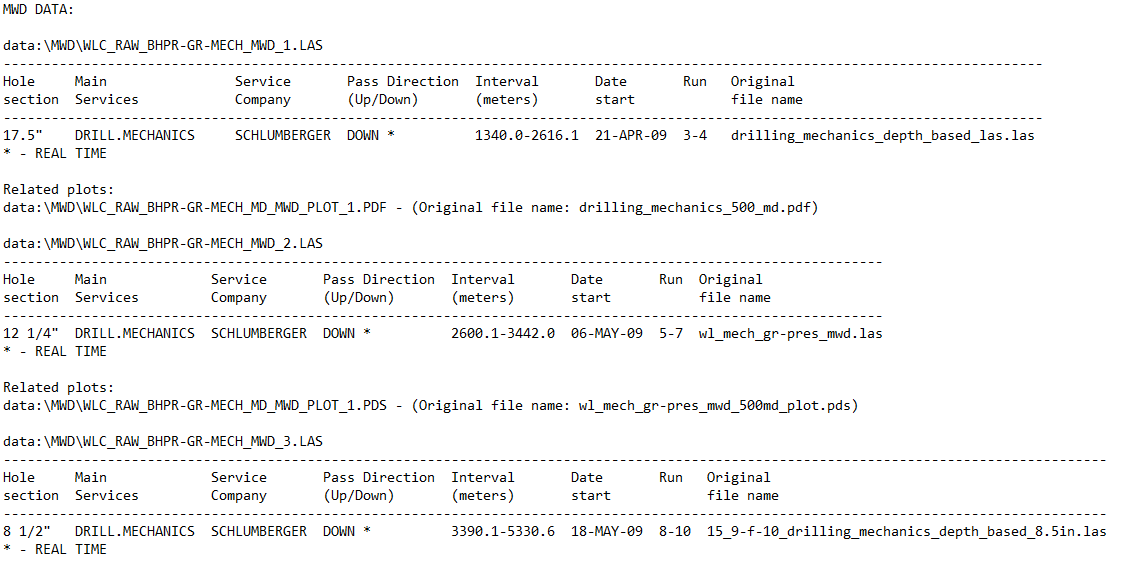

In [2]:
P1 = Project.from_las("F:/PetroleumData/15_9-F-10/LAS Files/WLC_RAW_BHPR-GR-MECH_MWD_1.LAS")
P2 = Project.from_las("F:/PetroleumData/15_9-F-10/LAS Files/WLC_RAW_BHPR-GR-MECH_MWD_2.LAS")
P3 = Project.from_las("F:/PetroleumData/15_9-F-10/LAS Files/WLC_RAW_BHPR-GR-MECH_MWD_3.LAS")

0it [00:00, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\welly\well.py:192: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
1it [00:02,  2.14s/it]
1it [00:01,  1.20s/it]
1it [00:02,  2.45s/it]


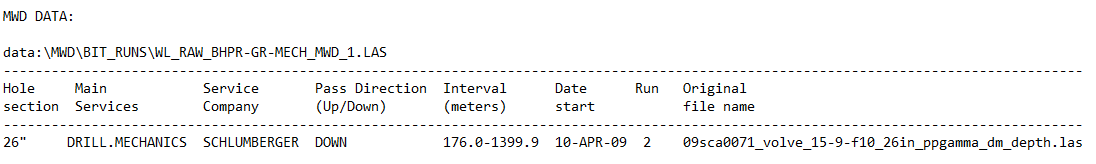

In [3]:
P4 = Project.from_las("F:/PetroleumData/15_9-F-10/LAS Files/WL_RAW_BHPR-GR-MECH_MWD_1.LAS")

1it [00:01,  1.23s/it]


In [4]:
P1 = P1.df()
P2 = P2.df()
P3 = P3.df()
P4 = P4.df()

In [5]:
P1.reset_index(inplace=True)  
del P1["UWI"]
P2.reset_index(inplace=True)  
del P2["UWI"]
P3.reset_index(inplace=True)  
del P3["UWI"]
P4.reset_index(inplace=True)  
del P4["UWI"]

In [6]:
lista = [P4, P1, P2,P3]

In [7]:
i = 0
for comp in lista:
    print("lista[",i,"]:\nmin:",comp["Depth"].min(),"\tmax:",comp["Depth"].max())
    print(comp.columns,"\n")
    i+=1

lista[ 0 ]:
min: 176.022 	max: 1399.9464000000007
Index(['Depth', 'TVDE', 'GRM1', 'ROP5', 'SWOB', 'RPM', 'TQA', 'SPM1', 'SPM2',
       'SPM3', 'SPPA', 'TFLO', 'TRPM_RT', 'STICK_RT', 'SHKPK_RT', 'SHKRSK_RT'],
      dtype='object') 

lista[ 1 ]:
min: 1340.0 	max: 2616.0500000007737
Index(['Depth', 'ROP', 'RPM', 'STOR', 'SWOB', 'TFLO', 'GR_CAL', 'STICK',
       'TRPM', 'SHKRSK', 'ECD', 'SPPA', 'DHAT'],
      dtype='object') 

lista[ 2 ]:
min: 2600.0964 	max: 3441.9539999996864
Index(['Depth', 'ROP5', 'ARC_GR_RT', 'SWOB', 'HKLD', 'TQA', 'RPM', 'STICK_RT',
       'CRPM_RT', 'TFLO', 'TRPM_RT', 'SPPA', 'SHKRSK_RT', 'SHKPK_RT',
       'ECD_ARC', 'APRS_ARC', 'ATMP'],
      dtype='object') 

lista[ 3 ]:
min: 3390.138 	max: 5330.647199999277
Index(['Depth', 'ROP5', 'GRMA_ECO_RT', 'STICK_RT', 'RPM', 'SWOB', 'TQA',
       'SHKRSK_RT', 'TFLO', 'SPPA', 'TRPM_RT', 'DHAP', 'DHAT', 'ECD'],
      dtype='object') 



## Common logs 
> "Depth", ROP, SWOB, RPM, TQA, SPPA, TFLO, GRM1, Stick, TRPM


In [8]:
P1n = P4[['Depth', 'ROP5','RPM', 'TQA', 'SWOB', 'TFLO','GRM1', 'STICK_RT', 'TRPM_RT', 'SPPA']]

In [9]:
P2n = P1[['Depth', 'ROP', 'RPM', 'STOR', 'SWOB', 'TFLO', 'GR_CAL', 'STICK','TRPM','SPPA']]
P2n = P2n.rename(columns={'ROP': 'ROP5', 'STOR': 'TQA', 'GR_CAL':'GRM1', 'STICK':'STICK_RT', 'TRPM':'TRPM_RT'})

In [10]:
P3n = P2[['Depth', 'ROP5','RPM', 'TQA', 'SWOB', 'TFLO', 'ARC_GR_RT', 'STICK_RT', 'TRPM_RT', 'SPPA']]
P3n = P3n.rename(columns={'ARC_GR_RT':'GRM1'})

In [11]:
P4n = P3[['Depth', 'ROP5','RPM', 'TQA', 'SWOB', 'TFLO','GRMA_ECO_RT', 'STICK_RT', 'TRPM_RT', 'SPPA']]
P4n = P4n.rename(columns={'GRMA_ECO_RT':'GRM1'})

In [12]:
frames = [P1n, P2n, P3n,P4n]

In [13]:
i = 0
for comp in frames:
    print("lista[",i,"]:\nmin:",comp["Depth"].min(),"\tmax:",comp["Depth"].max())
    print(comp.columns,"\n")
    i+=1

lista[ 0 ]:
min: 176.022 	max: 1399.9464000000007
Index(['Depth', 'ROP5', 'RPM', 'TQA', 'SWOB', 'TFLO', 'GRM1', 'STICK_RT',
       'TRPM_RT', 'SPPA'],
      dtype='object') 

lista[ 1 ]:
min: 1340.0 	max: 2616.0500000007737
Index(['Depth', 'ROP5', 'RPM', 'TQA', 'SWOB', 'TFLO', 'GRM1', 'STICK_RT',
       'TRPM_RT', 'SPPA'],
      dtype='object') 

lista[ 2 ]:
min: 2600.0964 	max: 3441.9539999996864
Index(['Depth', 'ROP5', 'RPM', 'TQA', 'SWOB', 'TFLO', 'GRM1', 'STICK_RT',
       'TRPM_RT', 'SPPA'],
      dtype='object') 

lista[ 3 ]:
min: 3390.138 	max: 5330.647199999277
Index(['Depth', 'ROP5', 'RPM', 'TQA', 'SWOB', 'TFLO', 'GRM1', 'STICK_RT',
       'TRPM_RT', 'SPPA'],
      dtype='object') 



## Sequencing logs

In [14]:
P2n = P2n[400:]

In [15]:
P3n = P3n[105:]

In [16]:
P4n = P4n[341:]

In [17]:
frames = [P1n,P2n,P3n,P4n]

In [18]:
i = 0
for comp in frames:
    print("lista[",i,"]:\nmin:",comp["Depth"].min(),"\tmax:",comp["Depth"].max())
    print(comp.columns,"\n")
    i+=1

lista[ 0 ]:
min: 176.022 	max: 1399.9464000000007
Index(['Depth', 'ROP5', 'RPM', 'TQA', 'SWOB', 'TFLO', 'GRM1', 'STICK_RT',
       'TRPM_RT', 'SPPA'],
      dtype='object') 

lista[ 1 ]:
min: 1400.0000000000364 	max: 2616.0500000007737
Index(['Depth', 'ROP5', 'RPM', 'TQA', 'SWOB', 'TFLO', 'GRM1', 'STICK_RT',
       'TRPM_RT', 'SPPA'],
      dtype='object') 

lista[ 2 ]:
min: 2616.098399999994 	max: 3441.9539999996864
Index(['Depth', 'ROP5', 'RPM', 'TQA', 'SWOB', 'TFLO', 'GRM1', 'STICK_RT',
       'TRPM_RT', 'SPPA'],
      dtype='object') 

lista[ 3 ]:
min: 3442.1063999999806 	max: 5330.647199999277
Index(['Depth', 'ROP5', 'RPM', 'TQA', 'SWOB', 'TFLO', 'GRM1', 'STICK_RT',
       'TRPM_RT', 'SPPA'],
      dtype='object') 



In [19]:
LAS_files = pd.concat(frames)
LAS_files = LAS_files.reset_index(drop=True)

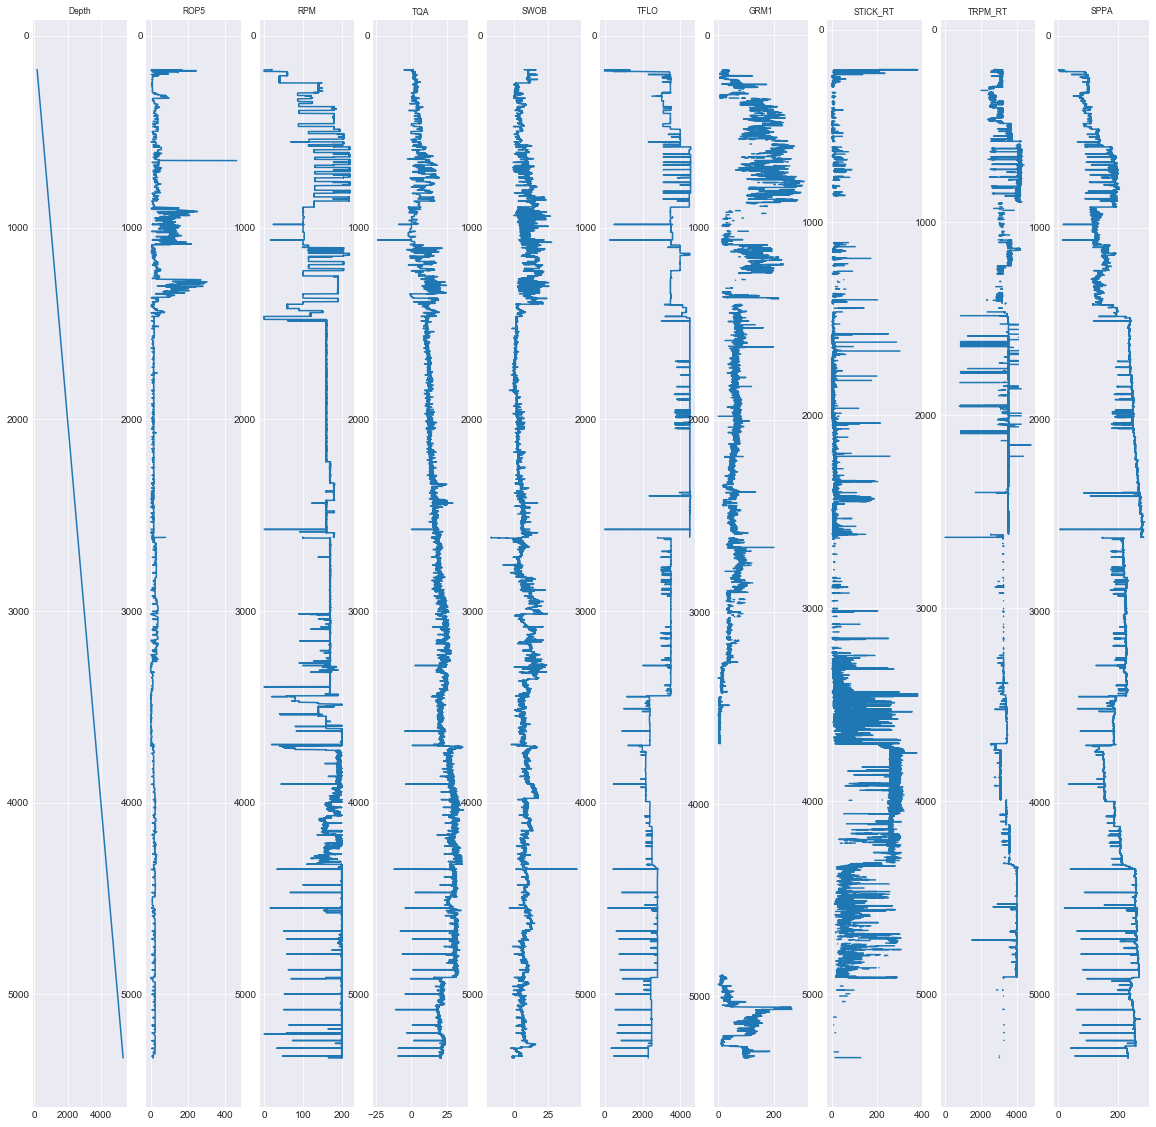

In [20]:
sc.well_plt(LAS_files)

Missing data graphically:


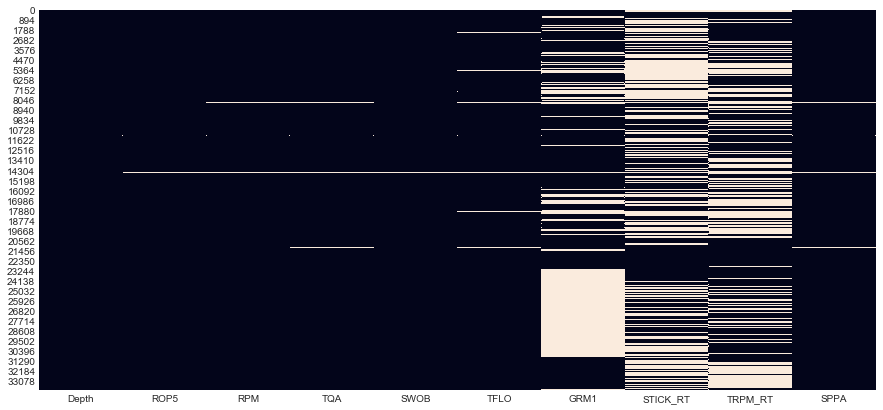

Missing data in dataframe:

          Total   Percent
Depth          0     0.00
SWOB         128     0.38
RPM          154     0.45
ROP5         156     0.46
TQA          167     0.49
SPPA         167     0.49
TFLO         412     1.21
GRM1       12642    37.23
TRPM_RT    12780    37.64
STICK_RT   15425    45.43


In [21]:
sc.missing_info(LAS_files)

## `KNN Imputer` for missing values 

In [22]:
from sklearn.impute import KNNImputer

In [23]:
print("Columns in dataframe :\n",LAS_files.columns.values)
print("Length of columns:",len(LAS_files.columns))

Columns in dataframe :
 ['Depth' 'ROP5' 'RPM' 'TQA' 'SWOB' 'TFLO' 'GRM1' 'STICK_RT' 'TRPM_RT'
 'SPPA']
Length of columns: 10


In [24]:
del LAS_files["TRPM_RT"]

In [25]:
print("Columns in dataframe : ",LAS_files.columns.values)
print("Length of columns:",len(LAS_files.columns))

Columns in dataframe :  ['Depth' 'ROP5' 'RPM' 'TQA' 'SWOB' 'TFLO' 'GRM1' 'STICK_RT' 'SPPA']
Length of columns: 9


In [28]:
%%time
imputer = KNNImputer(n_neighbors = 5)
knn_data = pd.DataFrame(imputer.fit_transform(LAS_files), columns = LAS_files.columns)

MemoryError: Unable to allocate 5.71 GiB for an array with shape (22576, 33953) and data type float64

## `KNN imputer`on GoogleColab
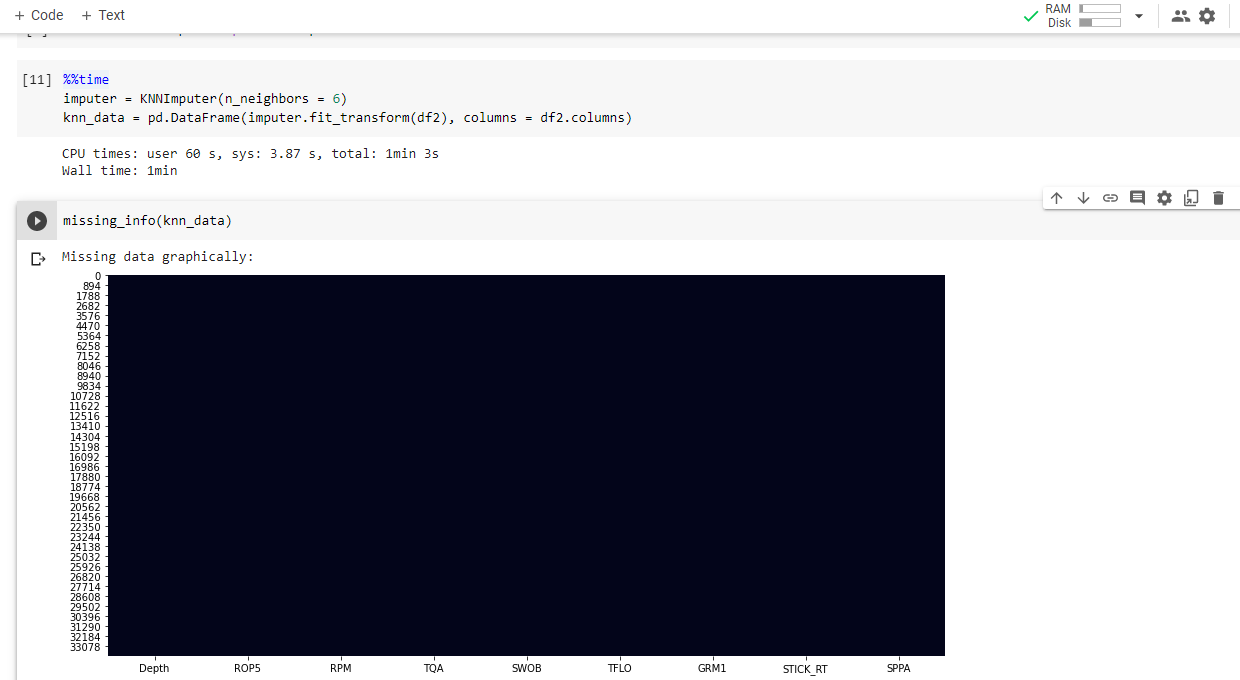